<a href="https://colab.research.google.com/github/gabrieldimas/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Transformasi Linear Brightness
𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 50


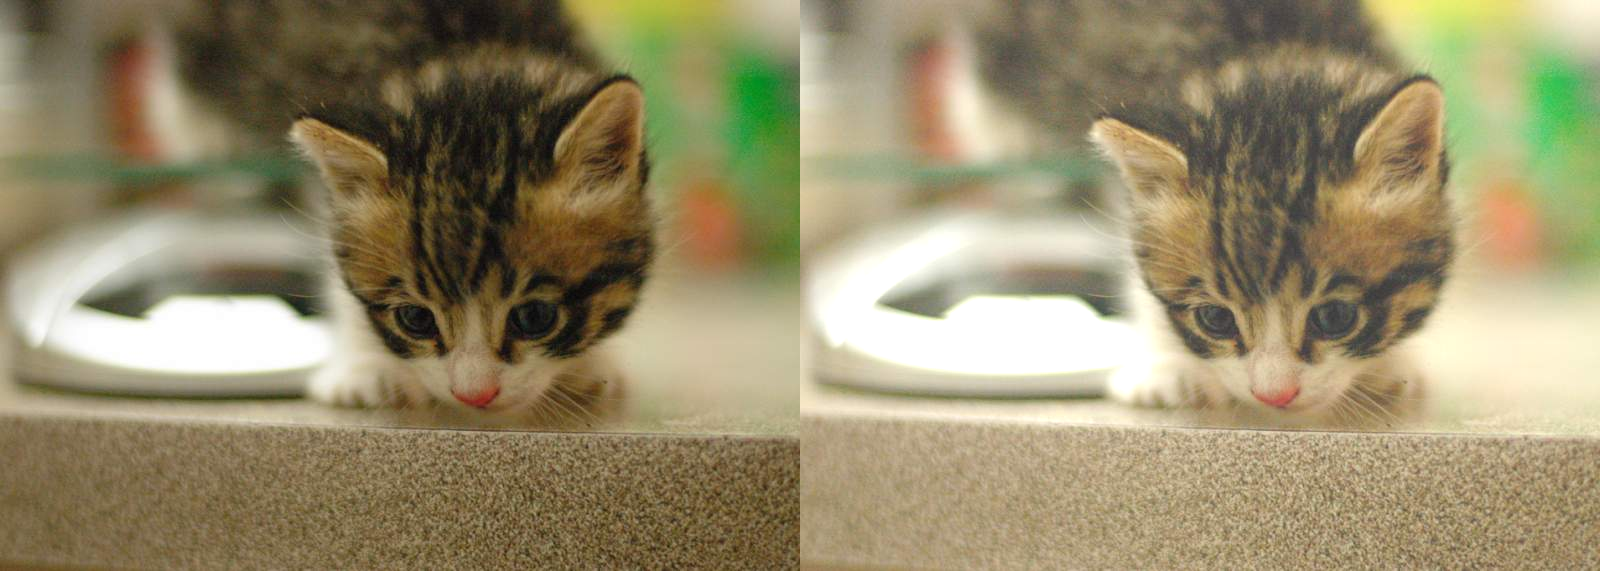

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


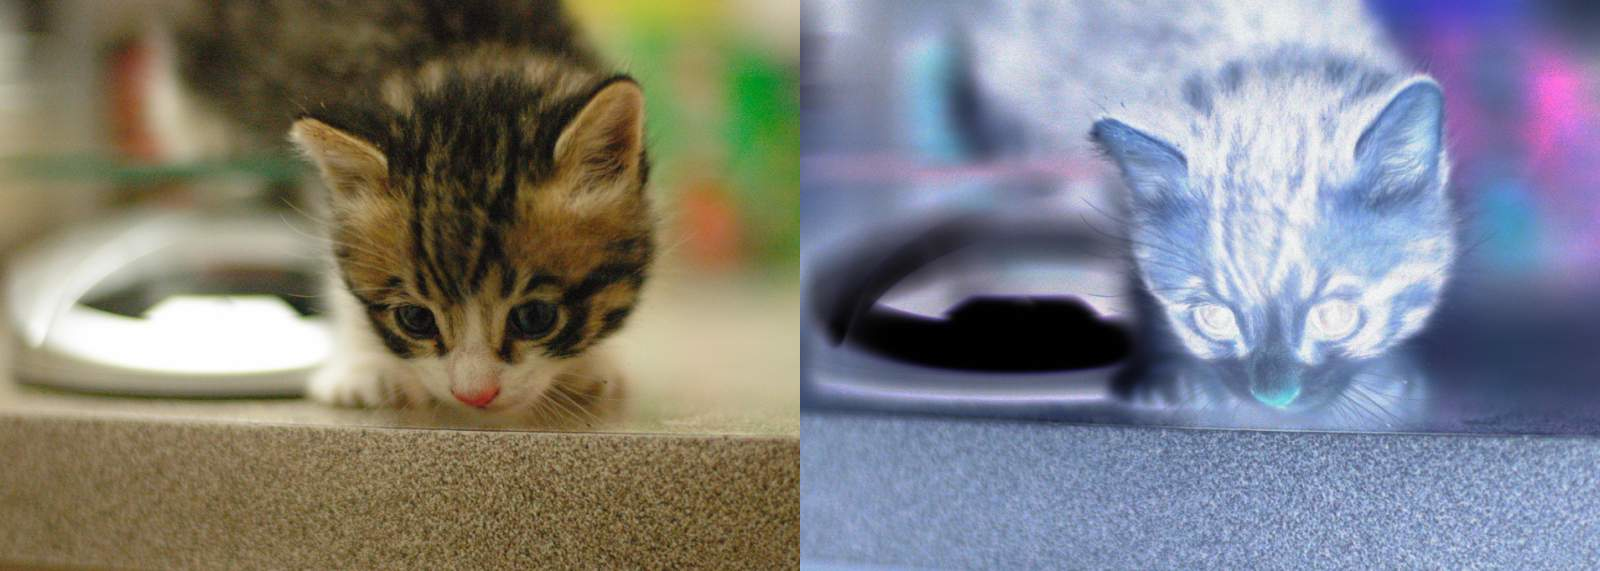

In [7]:
cat1 = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
height, width, channels = cat1.shape
inverted_cat1 = np.copy(cat1)

for i in range(channels):
    inverted_cat1[:, :, i] = 255 - inverted_cat1[:, :, i]

frame1 = cv.hconcat((cat1, inverted_cat1))
cv2_imshow(frame1)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


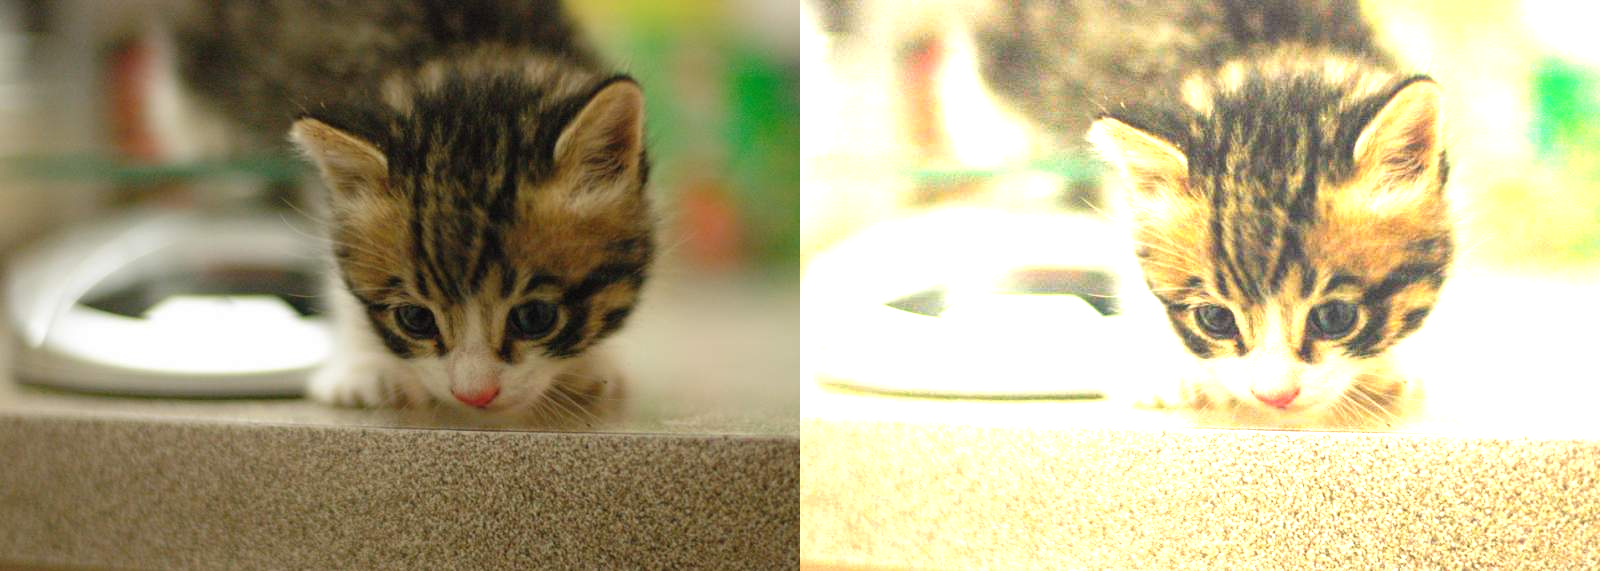

In [17]:
print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

#input kecerahan dan kontras
brght = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
ctr = float(input("Masukkan nilai kontras [1.0 - 3.0]: "))

# mengubah kecerahana dan kontras berdasarkan inputan
cat2 = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
adjusted_cat2 = cv.convertScaleAbs(cat2, alpha=ctr, beta=brght)

frame2 = cv.hconcat((cat2, adjusted_cat2))
cv2_imshow(frame2)

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


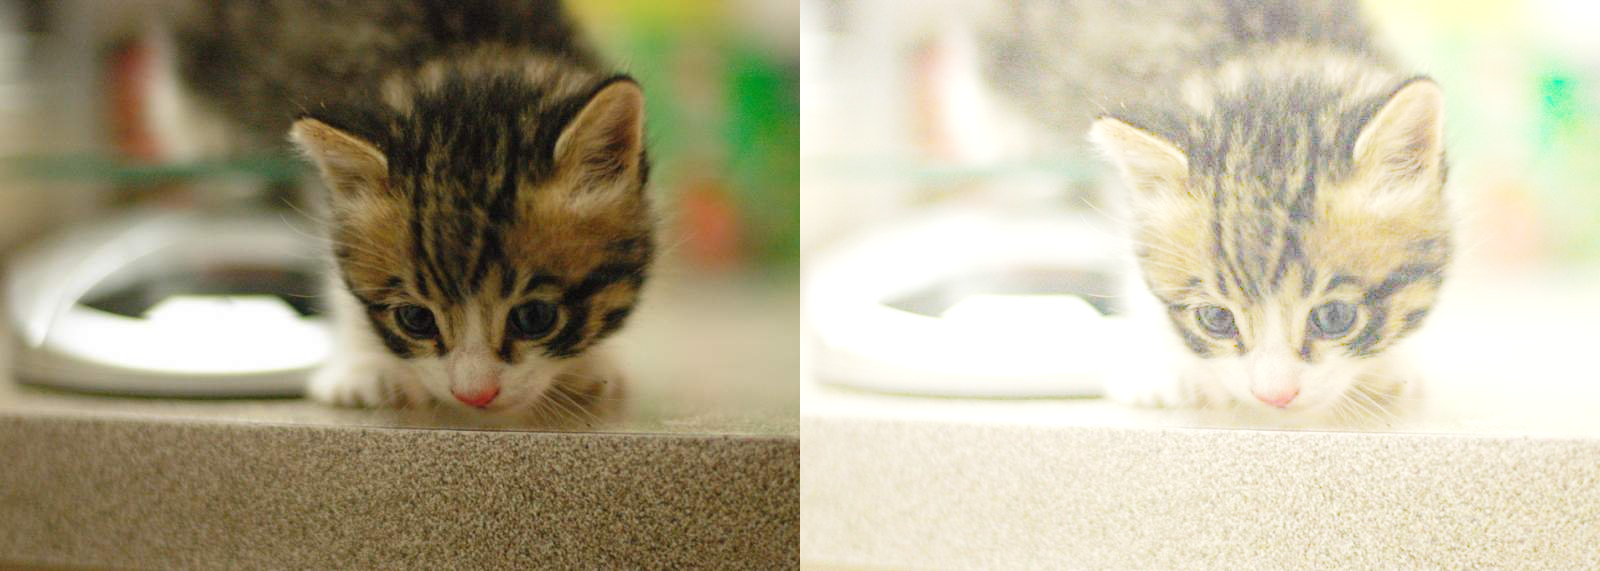

In [18]:

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  bvalue = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

cat3 = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
brightness_image = np.zeros(cat3.shape, cat3.dtype)

for y in range(cat3.shape[0]):
  for x in range(cat3.shape[1]):
    for c in range(cat3.shape[2]):
      brightness_image[y,x,c] = np.clip(bvalue*  (np.log(1 + cat3[y,x,c])), 0 , 255)

final_frame = cv.hconcat((cat3, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


*   Averaging

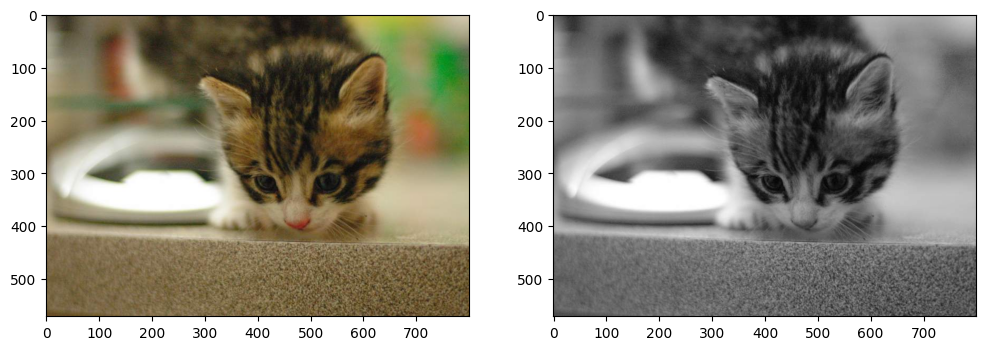

In [30]:
cat4a = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
grayscale_cat4a = cv.cvtColor(cat4a, cv.COLOR_BGR2GRAY)
fig, (original, gray_cat4a) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(cat4a, cv.COLOR_BGR2RGB))
gray_cat4a.imshow(grayscale_cat4a, cmap='gray')

plt.show()



*   Lightness



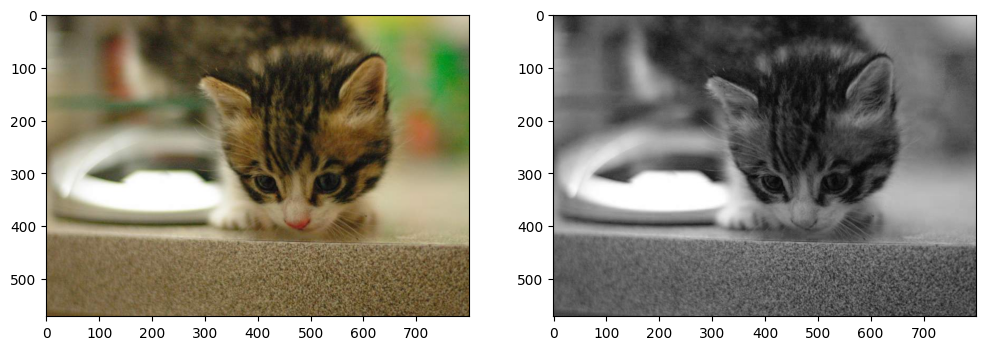

In [33]:
cat4b = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
hls_cat = cv.cvtColor(cat4b, cv.COLOR_BGR2HLS)
l_channel = hls_cat[:, :, 1]
fig, (original, ltcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(cat4b, cv.COLOR_BGR2RGB))
ltcat.imshow(l_channel, cmap='gray')

plt.show()



*   Luminance

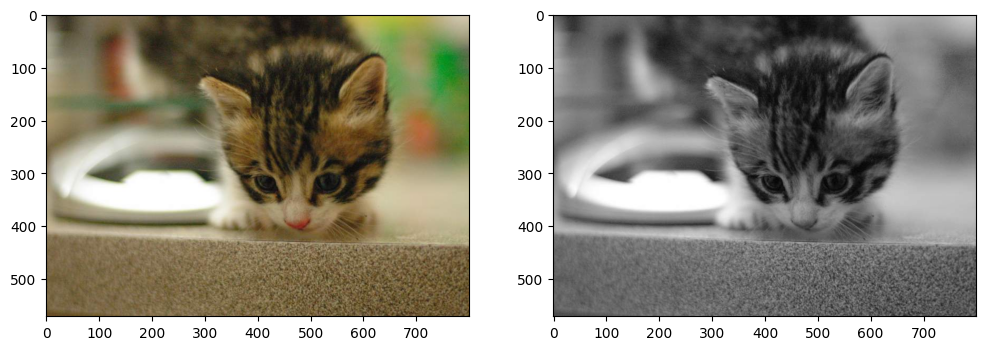

In [35]:
cat4c = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
yuv_cat = cv.cvtColor(cat4c, cv.COLOR_BGR2YUV)
y_channel = yuv_cat[:, :, 0]
fig, (original, lmcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(cat4c, cv.COLOR_BGR2RGB))
lmcat.imshow(y_channel, cmap='gray')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

(Disini saya menampilkan warna kuning)

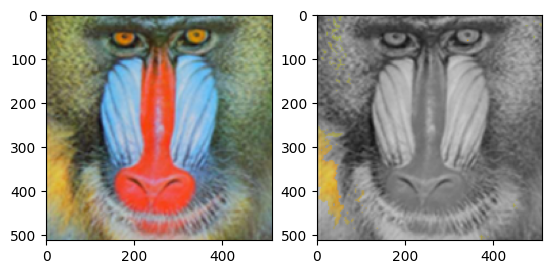

In [46]:
bro = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/mandrill.png')
bro_rgb = cv.cvtColor(bro, cv.COLOR_BGR2RGB)

lower_yellow = np.array([150, 150, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 100], dtype=np.uint8)
mask_yellow = cv.inRange(bro_rgb, lower_yellow, upper_yellow)

# invers mask kuning (kuning menjadi putih, latar belakang menjadi hitam)
mask_yellow_inv = cv.bitwise_not(mask_yellow)

# mengubah background menjadi gray
gray = cv.cvtColor(bro, cv.COLOR_BGR2GRAY)
bro = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar kuning dan background
out = cv.bitwise_and(bro_rgb, bro_rgb, mask=mask_yellow)
out_bg = cv.bitwise_and(bro, bro, mask=mask_yellow_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(bro_rgb)
ax[1].imshow(result)
plt.show()
